## Binary Trees

A binary tree is a special type of a tree data structure, where every node can have at most 2 children (ie every node can have either 0, 1 or 2 children, not more than 2)

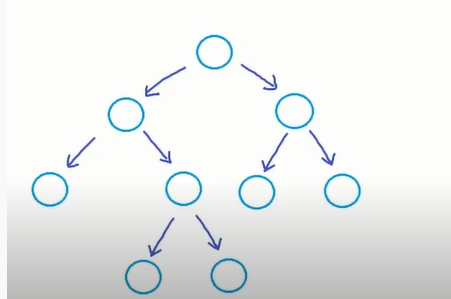


is a binary tree

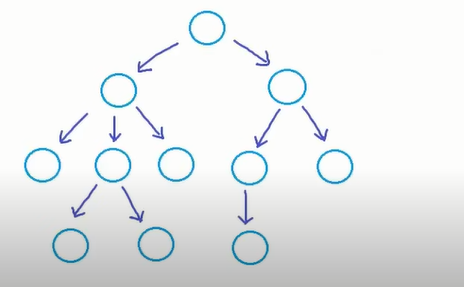 

is not as one node has > 2 elements

### Types of binary trees

1) Complete binary trees - We have already looked at this in the context of heaps which are complete binary trees. A binary tree of height h where all elements except the last level are completely filled, and the last level has elements filled in from the left is a complete binary tree


In other words, if you have an array representation of a binary tree, there should be no blanks


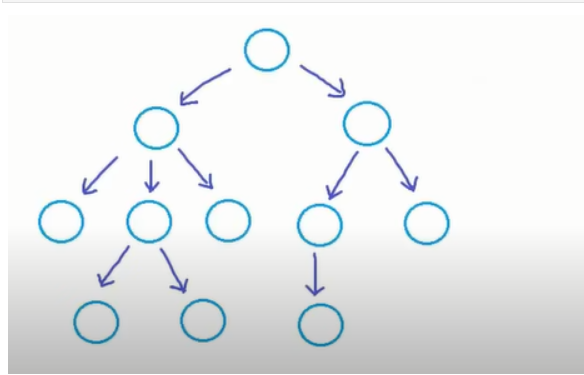

is NOT a complete binary tree, as in the last level, the first two left most elements are blank


2) Balanced binary tree - For each node, difference between height of left and right subtree is at max k

2 Binary search trees (BST) - A special type of binary tree, where at every node, all elements in the left sub tree of the node are <= the node, and all elements in the right sub tree are > the node

Here is an example of a binary search tree

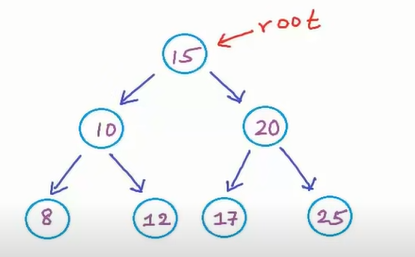

3 Fully filled binary tree or a perfect binary tree, where the tree has the maximum possible elements at every level

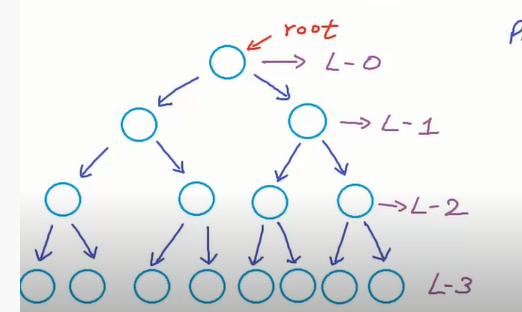



## Some properties of binary trees

1) if n total elements, Depth/Height of a tree in worse case is n-1 if every node has only one child. Note that this architecture is conceptually equivalent to a linked list
2) In best case, height of a tree is log(n). This happens in case of a complete binary tree

This is because number of elements at level i (starting with i=0 which is the root) is 2**i

Therefore, total number of elements in a perfect binary tree = 2^0 + 2^1...2^h 
= 2^(h+1) - 1

n = 2**(h+1) - 1
=> h = log2(n+1) - 1


For a complete binary tree, h = [log2(n)]
3) Definition : Height of tree with just one node is defined as 0, height of empty tree is -1

4) In a binary tree with n nodes, and e edges, e = n-1 (this is because all nodes except the root node have one incoming node)

## Implementation of binary trees

Binary trees can be implemented in 2 ways - 
1) dynamically created nodes, where every node has 3 parts, a value, a reference to th left node and a reference to the right mnode
2) Array representation.  because there is a deterministic relation in terms of index between parent and child. We saw this in heaps too 

http://localhost:8888/lab/tree/Algorithms-and-DS/concepts/heaps.ipynb

Given index i of parent, assuming root node starts at 0, left and right child are at 2*i+1 and 2*i +2 . or equivalently, assuming root node starts at 1, left and right child are at 2*i and 2*i + 1

In [2]:
## Python implentation of binary tree

In [1]:
class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left ## pointer to left sub tree
        self.right = right #3 pointer to right sub tree
    def __repr__(self):
        return 'TreeNode({})'.format(self.val)
        

In [ ]:
## Helper function from internet to convert array to tree

In [2]:
def deserialize(string):
    if string == '{}':
        return None
    nodes = [None if val == 'null' else TreeNode(int(val))
             for val in string.strip('[]{}').split(',')]
    kids = nodes[::-1]
    root = kids.pop()
    for node in nodes:
        if node:
            if kids: node.left  = kids.pop()
            if kids: node.right = kids.pop()
    return root

If you want to create a tree which looks like this : 

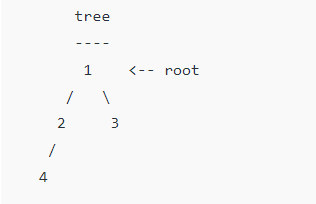

In [59]:
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)

In [15]:
root

## Traversal of binary trees

Unlike arrays , stacks, queues or linked lists which are linear data structures (which means order of visiting elements is unique), binary trees are non-linear data structures, so there can be multiple ways of visiting elements 

A traversal is an algorithm to visit every element exactly once in a deterministic way in a tree.

There are many different ways to do a traversal

There are two broad categories. For illustration, we shall use the tree below
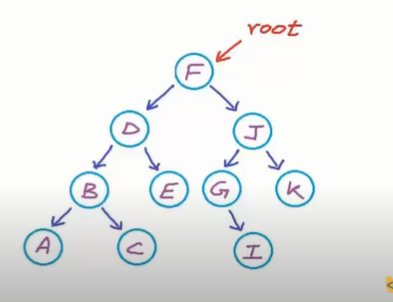




In [3]:
tre = TreeNode('F')
tre.left = TreeNode('D')
tre.right = TreeNode('J')
tre.left.left = TreeNode('B')
tre.left.right = TreeNode('E')
tre.left.left.left = TreeNode('A')
tre.left.left.right = TreeNode('C')
tre.right.left = TreeNode('G')
tre.right.left.right = TreeNode('I')
tre.right.right = TreeNode('K')

1) Breadth first : Where at every level, siblings are visited before visiting children. A example algorithm is level order traversal

In the tree above, it means visiting in order F,D,J,B,E,G,K,A,C,I ie from root all elements in same level are first visited before visiting children

2) Depth first : For every node, children of node and the node itself are visited before visiting siblings

For a binary tree , for every node, there are 6 permutations for visiting the left subtree (L), the node itself (N) and the right subtree (R)

NLR
LNR
LRN

NRL
RNL
RLN

By convention, out of these 6 posibilities, we always want to visit the left before right
Therefore, only 3 possibilities remain

NLR - This is called preorder traversal (pre because Node is visited before L and R)
LNR - Inorder traversal (in because Node is visited between L and R)
LRN - Post order traversal (because Node is visited after L and R)

One additional note : For a binary search tree , in order traversal yields elements in a sorted order

Order Complexity

All are O(n) time complexity since all nodes are visited
For level order, space complexity in worse case is O(n) - since in the queue, all elements in a level need to be stored, for a perfect binary tree, the last level has n/2 elements, so it will be O(n/2)

For in, pre and post, while we are not directly storing anything in memory, functions are called recursively which creates a function stack and freezes memory. This is O(h) of tree which is O(n) in worse case and O(logn) in average case


Traversals can be implemented recursively (more common) or iteratively. In case of iterative implementation of DFS, we use a stack data structure, in case of iterative implementation of Level order traversal, we use a queue


In [ ]:
# implementation - pre, in , post, level traversal

In [57]:
def preorder_traversal_recursive(root):
    if root is None:
        return
    print(root.val)
    preorder_traversal(root.left)
    preorder_traversal(root.right)

In [11]:
def inorder_traversal_recursive(root):
    if root is None:
        return
    
    inorder_traversal_recursive(root.left)
    print(root.val)
    inorder_traversal_recursive(root.right)

In [22]:
def inorder_traversal_iterative(root):
    
    stack = []
    cursor = root
    while (len(stack)>0) or (cursor is not None) :
        while (cursor is not None):
            stack.append(cursor)
            cursor = cursor.left
        output = stack.pop()
        print(output.val)
        if output.right is not None:
            cursor = output.right
        
        
        
        
        

In [67]:
def postorder_traversal_recursive(root):
    if root is None:
        return
    
    postorder_traversal(root.left)
    
    postorder_traversal(root.right)
    print(root.val)

In [81]:
from collections import deque
q = deque()

def levelorder_traversal(root):
    if root is None:
        return
    q.append(root)
    while len(q)>0:
        out = q.popleft()
        print(out.val)
        if out.left is not None:
            q.append(out.left)
        if out.right is not None:
            q.append(out.right)
    return
        
    

In [88]:
tree = TreeNode(1)
tree.left = TreeNode(2)
tree.left.left = TreeNode(3)

In [15]:
## inorder_traversal_recursive(tre)

In [23]:
inorder_traversal_iterative(tre)

A
B
C
D
E
F
G
I
J
K


In [95]:
q = deque()

In [91]:
q.append(tree)

In [92]:
out = q.popleft()
print(out.val)

1


In [100]:
q.append(tree.left)
q.append(tree.right)

In [101]:
tree.right

In [102]:
out1  = q.popleft()
print(out1.val)

2


In [104]:
out2 = q.popleft()

In [105]:
len(q)

0

In [107]:
print(out2)

None


In [64]:
preorder_traversal(tre)

F
D
B
A
C
E
J
G
I
K


In [80]:
inorder_traversal(tre)

A
B
C
D
E
F
G
I
J
K


In [68]:
postorder_traversal(tre)

A
C
B
E
D
I
G
K
J
F


In [82]:
levelorder_traversal(tre)

F
D
J
B
E
G
K
A
C
I


## Height of a binary tree

Recursive algorithm : height is the max of the height of the left subtree and height of 
right sub tree + 1

If node with no children is taken as height 0, empty node will be of height -1, and height of tree is number of edges in the path from root to lowermost leaf (which is no of nodes including root and lower most leaf - 1)

If , on the other hand, the convention is - node with no children is taken as height 1, empty node will be of height 0, height of tree is no of nodes including root and lower most leaf


In [266]:
def height_bt(node):
    if node is None:
        return 0 ## can be either 0 or -1 depending on definition if there is no tree
    else:
        height = max(height_bt(node.left), height_bt(node.right)) + 1
        return height

## Calculate diameter of a binary tree

Diameter is the longest path (number of edges) between 2 leaf nodes in a tree, which may or may not pass through the root.

The brute force way, which is O(n^2), is - for every node in tree, calculate  height of left subtree (with convention that empty node is -1), height of right subtree, and add 2 (for connection between node and left subtree, and node and right subtree)

This gives diameter at that node

Repeat for every node in the tree, take the max, that will give you the diameter
This however is O(n^2) and repeats a lot of operations - for example : finding height at root node has certain counts which are repeated when you take height at a sub node


Better O(n) solution. in a recursive way, start from bottom (leaf) and store the height values thus computed when calculating heights of nodes higher in the tree. So there's no need to revisit nodes

In [21]:
def height_diam(node, max_diameter):
    if node is None:
        return -1, 0
    height_left, max_d_left = height_diam(node.left, max_diameter)
    height_right, max_d_right = height_diam(node.right, max_diameter)
    h = max(height_left, height_right) + 1
    d = height_left + height_right + 2
    return h, max(d,max(max_d_left, max_d_right))


def diameter(node):
    max_diameter = 0
    if node is None:
        return 0
    
    height, max_diameter = height_diam(node, max_diameter)
    return max_diameter
    

In [36]:
def diameter_2(node):
    max_diameter = [0] ## global variable has to be a list, not a constant, as otherwise closure (the inside function) won't recognize it
    def traverse(node):
        if node is None:
            return -1
        left = traverse(node.left)
        right = traverse(node.right)
        h = max(left,right) + 1
        d = left + right + 2
        max_diameter[0] = max(max_diameter[0], d)
        return h
    traverse(node)
    return max_diameter[0]

In [37]:
diameter_2(node)

3

In [42]:
## Invert a binary tree (ie take mirror image around vertical axis) and return root

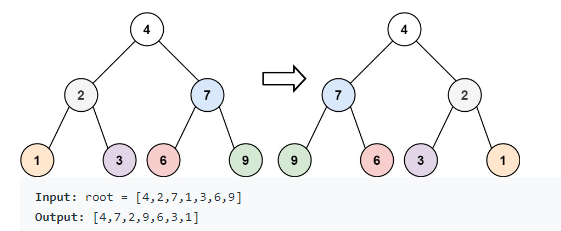

Solution : For every node, swap left and right subtree till you reach leaf

In [44]:
def invert_tree(node):
    if node is None:
        return None
    temp = node.right
    node.right = node.left
    node.left = temp
    invert_tree(node.left)
    invert_tree(node.right)
    
    return node

In [45]:
invert_tree(node)

## Merge two binary trees

Example :
    
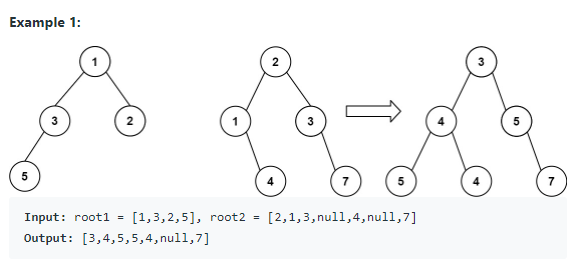

In [126]:
from collections import deque
import copy

def height(tree):
    if tree is None:
        return -1
    else:
        return max(height(tree.left), height(tree.right)) + 1

def merge(root1, root2):
    if root1 is None and root2 is None:
        return None
    if root1 is None and root2 is not None:
        output = TreeNode(root2.val)
    if root1 is not None and root2 is None:
        output = TreeNode(root1.val)
    if root1 is not None and root2 is not None:
        output = TreeNode(root1.val + root2.val)
    if root1 is None:
        root1_le = None
        root1_re = None
    else:
        root1_le = root1.left
        root1_re = root1.right
    if root2 is None:
        root2_le = None
        root2_re = None
    else:
        root2_le = root2.left
        root2_re = root2.right
        
        
    output.left = merge(root1_le, root2_le)
    output.right = merge(root1_re, root2_re)
    return output


        
    
    
    

In [119]:
root1 = TreeNode(1)
root1.left = TreeNode(3)
root1.right = TreeNode(2)
root1.left.left = TreeNode(5)

In [120]:
root2 = TreeNode(2)
root2.left = TreeNode(1)
root2.right = TreeNode(3)
root2.left.right = TreeNode(4)
root2.right.right = TreeNode(7)


In [127]:
out = merge(root1, root2)

## Check if binary tree is height balanced (a binary tree in which the left and right subtrees of every node differ in height by no more than 1.)

In [165]:
def isBalanced(root):
    output = [True]
    if root is None:
        return output[0]
    else:
        def height(root):
            if root is None:
                return -1
            height_left = height(root.left)
            height_right = height(root.right)
            print("value", root.val, "left", height_left, "right", height_right)
            if abs(height_left - height_right)>1:
                print("here")
                output[0] = False
            return max(height_left, height_right) + 1
        height(root)
        return output[0]

In [145]:
aa = TreeNode(1)
aa.left = TreeNode(2)
aa.left.left = TreeNode(3)
aa.left.left.left = TreeNode(4)
aa.left.right = TreeNode(3)
aa.right = TreeNode(2)

In [147]:
height(aa)

3

In [166]:
isBalanced(aa)

value 4 left -1 right -1
value 3 left 0 right -1
value 3 left -1 right -1
value 2 left 1 right 0
value 2 left -1 right -1
value 1 left 2 right 0
here


False

## All root to leaf paths
https://leetcode.com/problems/binary-tree-paths/
    
    
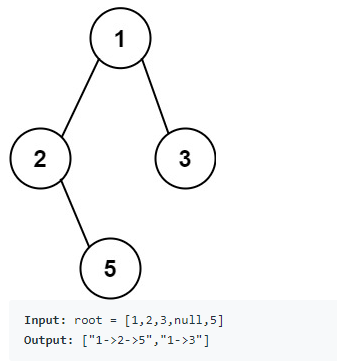

In [187]:
def binaryTreePaths(root):
    
    output = [[]]


    def dfs(root, st):
        if st=="": ## root node
            st = str(root.val)
        else:
            st = st +  "->" + str(root.val)
        if root.left is None and root.right is None: ##leaf node
            output[0].append(st) ## writing to output
        else:
            if root.left is not None:
                dfs(root.left, st)
            if root.right is not None:
                dfs(root.right, st)
        return st
        
    dfs(root, "") 
    return output[0]
            
                
                
            
            
            
        
        

In [188]:
binaryTreePaths(aa)

['1->2->3->4', '1->2->3', '1->2']

In [167]:
a = 'apple'

In [168]:
a[:-2]

'app'

In [159]:
def height(root):
    if root is None:
        return -1
    height_left = height(root.left)
    height_right = height(root.right)
    print("value", root.val, "left", height_left, "right", height_right)
    if abs(height_left - height_right)>1:
        print("here")
        output = [False]
    return max(height_left, height_right) + 1

In [163]:
bb = height(aa)

value 4 left -1 right -1
value 3 left 0 right -1
value 3 left -1 right -1
value 2 left 1 right 0
value 2 left -1 right -1
value 1 left 2 right 0
here


In [162]:
max(height(root.left), height(root.right))

2

## Maximum Binary Tree

https://leetcode.com/problems/maximum-binary-tree/

You are given an integer array nums with no duplicates. A maximum binary tree can be built recursively from nums using the following algorithm:

Create a root node whose value is the maximum value in nums.
Recursively build the left subtree on the subarray prefix to the left of the maximum value.
Recursively build the right subtree on the subarray suffix to the right of the maximum value.
Return the maximum binary tree built from nums.

In [206]:
def maximum_binary_tree(array):
    if len(array)==0:
        return None
    
    max_value = max(array)
    print(array, max_value)
    max_index = array.index(max_value)
    
    left_array = array[0:(max_index)]
    right_array = array[(max_index+1):]
    root = TreeNode(max_value)
    root.left = maximum_binary_tree(left_array)
    root.right = maximum_binary_tree(right_array)
    
    return root
    
    

In [198]:
nums = [3,2,1,6,0,5]
array = nums

In [213]:
a = maximum_binary_tree(nums)

[3, 2, 1, 6, 0, 5] 6
[3, 2, 1] 3
[2, 1] 2
[1] 1
[0, 5] 5
[0] 0


## Maximum Level Sum

https://leetcode.com/problems/maximum-level-sum-of-a-binary-tree/

Given the root of a binary tree, the level of its root is 1, the level of its children is 2, and so on.

Return the smallest level x such that the sum of all the values of nodes at level x is maximal.

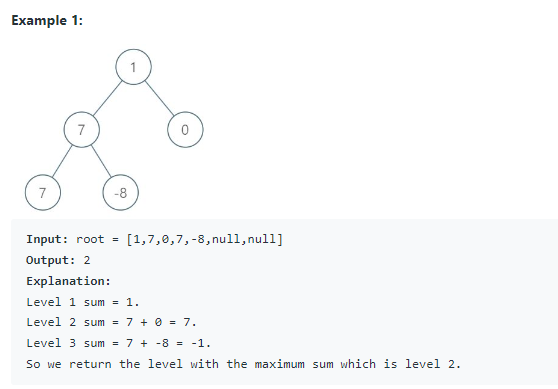

## Pseudocode : do a level order traversal, and keep track of sum at each level. One problem : how do you know when a level is done ?
One approach :  we know that at every level i, the maximum number of nodes is 2^i. so we keep track of number of nodes at every level (if None, we also add to queue to keep count). At a certain level, if number of nodes = max nodes , reset level sum. However, this is taking too much time. Is it because we are unnecessarily adding None to queue ? Is there a way to do this without adding None ? Can you create a separate queue to keep children ?

In [12]:

from collections import deque


def height_bt(node):
    if node is None:
        return 0 ## can be either 0 or -1 depending on definition if there is no tree
    else:
        height = max(height_bt(node.left), height_bt(node.right)) + 1
        return height
    

def maximum_level_sum(root):
    if root is None:
        return 0
    else:
        tree_height = height_bt(root)
        print("tree_height", tree_height)
        a = deque()
        max_value = None
        max_index = None


        count = 0
        level_sum = 0
        a.append(root)
        denom = 1
        outlist = []
        while len(a)>0:
            out = a.popleft()
            if out is not None:
                level_sum = level_sum + out.val
            if out is not None:
                a.append(out.left)
                a.append(out.right)
            else:
                a.append(None)
                a.append(None)
            count = count + 1
            if count == denom: ## perfectly divisible
                print("count", count)
                print("denom", denom)

                
                if max_value is None:
                    max_value = level_sum
                    level_corresponding_to_max_value = 1
                else:
                    if level_sum>max_value:
                        max_value = level_sum
                        level_corresponding_to_max_value = len(outlist) + 1
                    
                print(outlist)
                print("max_value", max_value)
                print("level_sum", level_sum)
                print("level_corresponding_to_max_value", level_corresponding_to_max_value)
                outlist.append(level_sum) ## this will be the sum for that level
                level_sum = 0
                denom = denom*2
                count = 0
                if len(outlist)==tree_height:
                    break
        print(outlist)
        ##return outlist.index(max(outlist)) + 1
        return level_corresponding_to_max_value
        
    

## Pseudocode : do a level order traversal, and keep track of sum at each level. One problem : how do you know when a level is done ?
One approach :  we know that at every level i, the maximum number of nodes is 2^i. so we keep track of number of nodes at every level (if None, we also add to queue to keep count). At a certain level, if number of nodes = max nodes , reset level sum. However, this is taking too much time. Is it because we are unnecessarily adding None to queue ? Is there a way to do this without adding None ? Can you create a separate queue to keep children ? We try to track level using a for loop

In [29]:
def maximum_level_sum_2(root):
    q = deque()
    q.append(root) ## since root can never be empty
    level = 0 ## variable to track level
    level_sum = 0
    outlist = []
    result = -100000
    result_level = 0
    
    while len(q)>0:
        level = level + 1 ## since 1 indexing is used for root
        number_of_elements_in_level = len(q)
        temp = number_of_elements_in_level
        level_sum = 0
        
        ## This inner while loop tracks the current level
        while temp>0:
            out = q.popleft()
            if out is not None:
                level_sum = level_sum + out.val
                if out.left is not None:
                    q.append(out.left)
                if out.right is not None:
                    q.append(out.right)
            temp = temp - 1
        ##
        outlist.append(level_sum)
        print("outlist", outlist)
        print("level_sum", level_sum)
        print("result", result)
        if level_sum>result:
            result = level_sum
            result_level = level
    return result_level
                
        


In [24]:
maximum_level_sum_2(ou)

outlist [989]
outlist [989, 10250]
outlist [989, 10250, 9305]
outlist [989, 10250, 9305, -32127]


2

https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/

Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

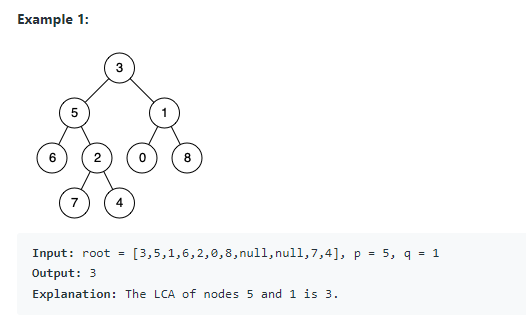

The following approach is O(n) in time , but occupies space as it saves the entire path to p and q.
Its decent but can we have an approach where we don't need entire path to p and q ?

In [60]:
def lowestCommonAncestor(root: 'TreeNode', p: 'TreeNode', q: 'TreeNode'):
    
    outlist = [[root]] ## default, at the very least , root will be a common ancestor
    

    def dfs(root, p, q):
        outlist_p = [[]]
        outlist_q = [[]]

        print("p", p)
        def dfs(root, st , m, is_p):
            if st=="": ## root node
                st = str(root.val)
            else:
                st = st + str(root.val)
            if root.val==m:
                if is_p:
                    outlist_p[0].append(st)
                else:
                    outlist_q[0].append(st)
            else:
                if root.left is not None:
                    dfs(root.left, st, m, is_p)
                if root.right is not None:
                    dfs(root.right, st, m, is_p)
        dfs(root, "", p.val, True)
        dfs(root, "", q.val, False)
        print(outlist_p)
        p_list = [int(x) for x in list(outlist_p[0][0])]
        q_list = [int(x) for x in list(outlist_q[0][0])]
        val_to_return =  [x  for x in p_list if x in q_list ][-1]
        
        output = [[root]]
        def dfs2(root, val_to_return):
            if root.val==val_to_return:
                output[0] = [root]
            if root.left is not None:
                dfs2(root.left, val_to_return)
            if root.right is not None:
                dfs2(root.right, val_to_return)
        dfs2(root, val_to_return)
        return output[0][0]
        
        
    
    

## updated LCA algorithm which doesn't store all path

In [67]:
def lowestCommonAncestor2(root: 'TreeNode', p: 'TreeNode', q: 'TreeNode'):
    if root is None:
        return None
    else:
        if root.val==p.val:
            return root
        if root.val==q.val:
            return root
        if root.left is not None:
            left_lca = lowestCommonAncestor2(root.left, p, q)
        else:
            left_lca = None
        if root.right is not None:
            right_lca = lowestCommonAncestor2(root.right, p, q)
        else:
            right_lca = None
        if left_lca is None and right_lca is None:
            return None
        if left_lca is not None and right_lca is not None:
                return root
        if left_lca is not None:
            return left_lca
        if right_lca is not None:
            return right_lca
            
        
            
        

In [63]:
t = deserialize('{[3,5,1,6,2,0,8,null,null,7,4]}')

In [66]:
lowestCommonAncestor2(t, t.left, t.left.right)


5

In [49]:
list('123')

['1', '2', '3']

In [58]:
p_list = [3,5,6,9]
q_list = [3,5,8,2]

In [59]:
 [x  for x in p_list if x in q_list ]

[3, 5]

Longest univalue path : 
Given the root of a binary tree, return the length of the longest path, where each node in the path has the same value. This path may or may not pass through the root.

The length of the path between two nodes is represented by the number of edges between them.

https://leetcode.com/problems/longest-univalue-path/

In [127]:
def longestUnivaluePath(root) -> int:
    if root is None:
        return 0
    output = [0]
    
    def get_univalue_path(root, prev_value):
        if root is None:
            return 0
        else:
            ##print("value", root.val)
            if root.left is None and root.right is None:
                return 0 ## leaf node
            else:
                left_return = 0
                right_return = 0
                if root.left is not None:
                    left_return = get_univalue_path(root.left, prev_value)
                if root.right is not None:
                    right_return = get_univalue_path(root.right, prev_value)
                value_to_overwrite = 0
                value_to_return = 0
                if (root.left is not None) and (root.right is not None):
                    if (root.val==root.left.val) and (root.val==root.right.val):
                        value_to_overwrite = left_return + right_return + 2
                        value_to_return = max(left_return, right_return) + 1
                    elif (root.val==root.left.val):
                        value_to_overwrite = left_return +  1
                        value_to_return = left_return + 1
                    elif (root.val==root.right.val):
                        value_to_overwrite = right_return + 1
                        value_to_return = right_return + 1

                else: ## one of them is not None,
                    if root.left is not None:
                        if (root.val==root.left.val):
                            value_to_overwrite = left_return +  1
                            value_to_return = left_return + 1
                    if root.right is not None:
                        if (root.val==root.right.val):
                            value_to_overwrite = right_return +  1
                            value_to_return = right_return + 1
                        
                    
                        

                if value_to_overwrite > output[0]:
                    output[0] = value_to_overwrite
                return value_to_return

    get_univalue_path(root, 0)
    return max(0, output[0])
            
                    
                    
                    
            

In [136]:
test_tree = deserialize('{[5,4,5,1,1,null,5]}')

In [137]:
longestUnivaluePath(test_tree)

value 5
value 4
value 1
value 1
value 5
value 5


2

## deletion in binary tree

https://www.geeksforgeeks.org/deletion-binary-tree/

Given a binary tree, delete a node from it by making sure that the tree shrinks from the bottom (i.e. the deleted node is replaced by the bottom-most and rightmost node). This is different from BST deletion. Here we do not have any order among elements, so we replace them with the last element. The inputs are the root and value to be deleted, assume all values in tree are unique


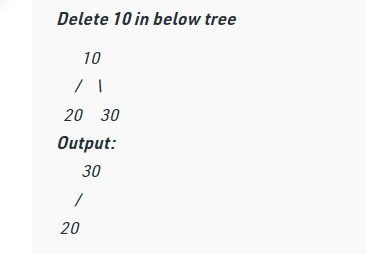

In [157]:
## 3 steps
## 1) find last node (lowest level and right most) - this is done using an inorder traversal
## 2) find node which needs to be deleted - traversal, and replace its value with value of last nide
## 3) find parent of last node and set the left or right of the parent of last node to none as the case may be

def delete_node_from_binary_tree(root, node):
    last_element = [None]
    
    def in_order(root):
        if root is None:
            pass
        else:
            if root.left is not None:
                in_order(root.left)
            
            if root.right is not None:
                in_order(root.right)
            if (root.left is None) and (root.right is None): ## leaf node
                last_element[0] = root.val
        return last_element[0] ## bcause it is inorder, the leaf finally obtained is the right most and lower most element
    
    def delete_last_element(root):
        if root is None:
            pass
        else:
            if root.left is not None:
                if root.left.val==last_element[0]:
                    root.left = None
            if root.right is not None:
                if root.right.val==last_element[0]:
                    root.right = None
        
    def replace_node_with_last_element(root, node):
        if root is None:
            pass
        else:
            if root.val==node:
                root.val = last_element[0]
            else:
                if root.left is not None:
                    replace_node_with_last_element(root.left, node)
                if root.right is not None:
                    replace_node_with_last_element(root.right, node)
    
    in_order(root)
    delete_last_element(root)
    replace_node_with_last_element(root, node)
    
                    
            
        

In [162]:
a = TreeNode(10)
a.left = TreeNode(20)
a.right = TreeNode(30)
a.right.right = TreeNode(40)

In [163]:
delete_node_from_binary_tree(a, 20)

## Right Side View

https://leetcode.com/problems/binary-tree-right-side-view/

Given the root of a binary tree, imagine yourself standing on the right side of it, return the values of the nodes you can see ordered from top to bottom.

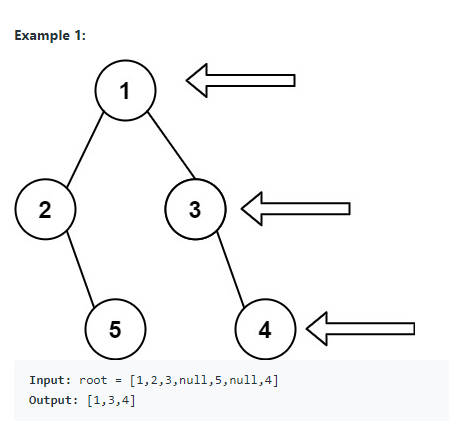

In [29]:

from collections import deque
q = deque()

def rightSideView(root):
    
    output_final = []
    if root is None:
        return output_final
    
    
    q.append(root)
    while (len(q)>0):
        output_final.append(q[-1].val)  ## right most element
        num_elements_level = len(q)
        while (True):
            output = q.popleft()
            num_elements_level = num_elements_level - 1
            if output.left is not None:
                q.append(output.left)
            if output.right is not None:
                q.append(output.right)
            if num_elements_level==0:
                break
    return output_final
        
                
            

In [32]:
tre = deserialize('{[1,2,3,4]}')

In [33]:
rightSideView(tre)

[1, 3, 4]

In [19]:
from collections import deque

In [20]:
a = deque()

In [21]:
a.append(1)

In [22]:
a.append(2)

In [23]:
a[-1]

2

https://leetcode.com/problems/same-tree/

Given the roots of two binary trees p and q, write a function to check if they are the same or not.

Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.

In [8]:
def isSameTree(p, q):
    output = [True]
    
    def dfs(p, q):
        if p.val != q.val:
            output[0] = False
            return
        else:
            if (p.left and not q.left) or (q.left and not p.left):
                output[0] = False
                return
            else:
                if (p.left is not None) and (q.left is not None):
                    dfs(p.left, q.left)
            if (p.right and not q.right) or (q.right and not p.right):
                output[0] = False
                return
            else:
                if (p.right is not None) and (q.right is not None):
                    dfs(p.right, q.right)
    
    
    if (not p) and (not q):
        return True
    elif (not p) and q:
        return False
    elif (not q) and p:
         return False
    else:
        dfs(p, q)
    
    
    
    return output[0]

In [15]:
p = deserialize('{[1,2,3]}')
q = deserialize('{[1,2,3]}')

In [16]:
isSameTree(p, q)

True